In [987]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import seaborn as sns

import statsmodels.api as sm
import statsmodels.tsa.api as tsa

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_absolute_percentage_error

import nevergrad as ng

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy.stats.mstats import winsorize


# EDA

**Read dataframes**

In [988]:
df_week = pd.read_csv('input/data_weekly.csv')
df_week.head(5)

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,brand_knowledge,christmas_dummy,weather_index,investment_competition_1,investment_competition_2,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales
0,01.10.2020,9.813096e+05,0.0,236646.24270,0.0000,871248.6945,186,22777.0,64817.0000,0,0.724231,0,71.050000,4.469290e+06,1.646746e+07,29.957143,0.428392,0.439821,201740,28225189.15
1,08.10.2020,1.204436e+06,0.0,492336.78720,0.0000,780996.4369,186,22905.3,290340.0000,0,0.810316,0,54.744286,3.424972e+06,9.855486e+06,7.314286,0.396890,0.511645,201741,33173110.86
2,15.10.2020,1.321570e+06,0.0,291885.33780,0.0000,932173.8794,186,23328.8,824941.0000,0,0.778179,0,54.311429,1.502713e+07,1.812631e+07,9.500000,0.440410,0.394800,201742,30504393.42
3,22.10.2020,2.155215e+05,0.0,110500.83200,0.0000,683081.4701,186,23485.3,591291.0000,1,0.804275,0,68.302857,1.147109e+07,1.579170e+07,30.485714,0.404397,0.413794,201743,30335675.45
4,29.10.2020,9.799192e+04,0.0,58135.35929,175435.8015,539848.5232,186,23557.1,554888.8674,0,0.817915,0,63.864286,1.876094e+07,2.324122e+07,19.728571,0.500315,0.452294,201744,25670890.36


In [989]:
df_week.tail(5)

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,brand_knowledge,christmas_dummy,weather_index,investment_competition_1,investment_competition_2,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales
112,24.11.2022,0.000,0.0,0.0,26600.5635,2.018774e+06,142,28175.0,17469024.98,0,0.709503,0,65.965714,8383346.483,22385049.65,19.100000,0.552689,0.471849,201948,23974410.26
113,01.12.2022,0.000,0.0,0.0,0.0000,9.954599e+05,142,28109.8,12131550.24,0,0.778967,0,67.607143,3788887.598,28046114.92,11.242857,0.501246,0.500979,201949,20884279.92
114,08.12.2022,0.000,0.0,0.0,0.0000,1.652220e+06,142,28290.7,20624785.51,0,0.721600,0,71.281429,5688529.991,27570241.08,13.071429,0.493944,0.444787,201950,21475590.81
115,15.12.2022,0.000,0.0,0.0,0.0000,9.946260e+05,142,28608.6,20449414.88,0,0.795736,0,63.042857,4501809.765,28072433.02,11.057143,0.524342,0.505004,201951,23863407.52
116,22.12.2022,1421815.694,0.0,0.0,0.0000,7.035735e+05,142,28701.7,11604843.10,3,0.711990,1,73.668571,1067903.548,22751932.87,23.228571,0.523796,0.505997,201952,15043045.07


In [990]:
df_week.dtypes

Date                         object
investment_tv               float64
investment_radio            float64
investment_press            float64
investment_banners          float64
investment_online           float64
stores_opened                 int64
economy_index               float64
investment_competition      float64
public_holidays               int64
brand_knowledge             float64
christmas_dummy               int64
weather_index               float64
investment_competition_1    float64
investment_competition_2    float64
precipitation_index         float64
competitor_recognition_1    float64
competitor_recognition_2    float64
YearWeek                      int64
sales                       float64
dtype: object

In [991]:
# check for NaN
df_week.isna().sum()

Date                        0
investment_tv               0
investment_radio            0
investment_press            0
investment_banners          0
investment_online           0
stores_opened               0
economy_index               0
investment_competition      0
public_holidays             0
brand_knowledge             0
christmas_dummy             0
weather_index               0
investment_competition_1    0
investment_competition_2    0
precipitation_index         0
competitor_recognition_1    0
competitor_recognition_2    0
YearWeek                    0
sales                       0
dtype: int64

In [992]:
# Convert date into datetime
df_week['Date'] = pd.to_datetime(df_week['Date'], format='%d.%m.%Y')
df_week.head(3)

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,brand_knowledge,christmas_dummy,weather_index,investment_competition_1,investment_competition_2,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales
0,2020-10-01,981309.627,0.0,236646.2427,0.0,871248.6945,186,22777.0,64817.0,0,0.724231,0,71.050000,4.469290e+06,1.646746e+07,29.957143,0.428392,0.439821,201740,28225189.15
1,2020-10-08,1204435.829,0.0,492336.7872,0.0,780996.4369,186,22905.3,290340.0,0,0.810316,0,54.744286,3.424972e+06,9.855486e+06,7.314286,0.396890,0.511645,201741,33173110.86
2,2020-10-15,1321570.322,0.0,291885.3378,0.0,932173.8794,186,23328.8,824941.0,0,0.778179,0,54.311429,1.502713e+07,1.812631e+07,9.500000,0.440410,0.394800,201742,30504393.42


**Charts functions**

In [993]:
def line_plot_secondary_axis_px(df, x_col_name, y1_col_name, y2_col_name, x_label, y1_label, y2_label, title):
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Scatter(x=df[x_col_name], y=df[y1_col_name], name=y1_label),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=df[x_col_name], y=df[y2_col_name], name=y2_label),
        secondary_y=True,
    )

    # Add figure title
    fig.update_layout(
        title_text=title
    )

    # Set x-axis title
    fig.update_xaxes(title_text=x_label)

    # Set y-axes titles
    fig.update_yaxes(title_text=f"<b> {y1_label} </b> ", secondary_y=False)
    fig.update_yaxes(title_text=f"<b> {y2_label} </b> ", secondary_y=True)

    # Set the size of the subplot
    fig.update_layout(height=600, width=1200)

    fig.show()

In [994]:
def line_plot_px(df, x_col_name, y_col_name, x_label, y_label, title):

    fig = px.line(  df, 
                    x=x_col_name, 
                    y=y_col_name, 
                    height=600,
                    width=1200, 
                    title=title,
                    )

    fig.update_layout(  yaxis_title=y_label,
                        xaxis_title=x_label,
                        )
    fig.show()

**Charts**

In [995]:
line_plot_px(df = df_week, 
             title = 'Sales',
             x_col_name = 'Date',
             y_col_name = ['sales'], 
             x_label = 'date-weeks', 
             y_label = 'money [CZK]'
             )

In [996]:
line_plot_secondary_axis_px(df=df_week,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='stores_opened', 
                            x_label='date-weeks',
                            y1_label='Sales',
                            y2_label = 'Number of opened stores',
                            title='Sales vs Stores opened'
                            )

In [997]:
line_plot_px(df = df_week, 
             title = 'Kinds of investments',
             x_col_name = 'Date', 
             y_col_name = ['investment_tv', 'investment_radio', 'investment_press', 'investment_banners', 'investment_online'],
             x_label = 'date-weeks', 
             y_label = 'money [CZK]'
             )

In [998]:
line_plot_secondary_axis_px(df=df_week,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='investment_online', 
                            x_label='date-weeks',
                            y1_label='Sales',
                            y2_label = 'Investments online',
                            title='Sales vs Stores opened'
                            )

In [999]:
fig = px.scatter(df_week, 
                 x='investment_tv', 
                 y='sales', 
                 height=600, 
                 width=1200,
                 title='Sales vs investment_tv',
                 trendline='ols',
                 )
fig.show()

In [1000]:
fig = px.scatter(df_week, 
                 x='investment_radio', 
                 y='sales', 
                 height=600, 
                 width=1200,
                 title='Sales vs investment_radio',
                 trendline='ols',
                 )
fig.show()

In [1001]:
fig = px.scatter(df_week, 
                 x='investment_press', 
                 y='sales', 
                 trendline="ols",
                 height=600, 
                 width=1200,
                 title='Sales vs investment_press'
                 )
fig.show()

In [1002]:
fig = px.scatter(df_week, 
                 x='investment_banners', 
                 y='sales', 
                 trendline="ols",
                 height=600, 
                 width=1200,
                 title='Sales vs investment_banners'
                 )
fig.show()

In [1003]:
fig = px.scatter(df_week, 
                 x='investment_online', 
                 y='sales', 
                 trendline="ols",
                 height=600, 
                 width=1200,
                 title='Sales vs investment_online'
                 )
fig.show()

**Outliers - winsorize**

In [1004]:
fig = px.box(df_week, y='investment_online', width=400, height=600)
fig.show()

In [1005]:
# windsorize outliers value is lower and upper percentage when the outliers are replaced by the closest one
df_week['investment_online_edited'] = winsorize(df_week['investment_online'], (0.05,0.05))

In [1006]:
fig = px.scatter(df_week, 
                 x='investment_online_edited', 
                 y='sales', 
                 trendline="ols",
                 height=600, 
                 width=1200,
                 title='Sales vs investment_online_edited'
                 )
fig.show()

**EDA-conclusions**

In [1007]:
''' 
Conclusions:
    - Sales has decreasing trend - probably influenced by opened shops. Highest peaks in Automn (September, October)
    - The highest investments are in TV then in online sector and press.
    - Scatter plot 'Sales vs investment-TV' show that investments after certain point do not increase the sales!!!
    - Online investment shows some outliers (replacing them by neighbouring values by windsorizing led to the worse results on MAPE)
'''

" \nConclusions:\n    - Sales has decreasing trend - probably influenced by opened shops. Highest peaks in Automn (September, October)\n    - The highest investments are in TV then in online sector and press.\n    - Scatter plot 'Sales vs investment-TV' show that investments after certain point do not increase the sales!!!\n    - Online investment shows some outliers (replacing them by neighbouring values by windsorizing led to the worse results on MAPE)\n"

# Merging monthly data

In [1008]:
# read data
df_month = pd.read_csv('input/data_monthly.csv')
df_month.head(5)

,Date,unemployment,tourists,gdp,confidence
0,01.01.2020,5.290542,549816,1.408679,115.319086
1,01.02.2020,5.143808,561622,1.408679,113.495436
2,01.03.2020,4.789755,696325,1.408679,114.031803
3,01.04.2020,4.388351,867699,2.443518,113.709983
4,01.05.2020,4.117193,941760,2.443518,113.709983


In [1009]:
# Check types 
df_month.dtypes

Date             object
unemployment    float64
tourists          int64
gdp             float64
confidence      float64
dtype: object

In [1010]:
# Convert dates
df_month['Date'] = pd.to_datetime(df_month['Date'], format='%d.%m.%Y')
df_month.head(5)

,Date,unemployment,tourists,gdp,confidence
0,2020-01-01,5.290542,549816,1.408679,115.319086
1,2020-02-01,5.143808,561622,1.408679,113.495436
2,2020-03-01,4.789755,696325,1.408679,114.031803
3,2020-04-01,4.388351,867699,2.443518,113.709983
4,2020-05-01,4.117193,941760,2.443518,113.709983


In [1011]:
df_month.dtypes

Date            datetime64[ns]
unemployment           float64
tourists                 int64
gdp                    float64
confidence             float64
dtype: object

In [1012]:
# Get min and max dates from weekly data
min_date = df_week['Date'].min()
max_date = df_week['Date'].max()

print(min_date)
print(max_date)

2020-10-01 00:00:00
2022-12-22 00:00:00


In [1013]:
# Get a daily dates
daily_dates = pd.date_range(start=min_date, end=max_date, freq='D')

In [1014]:
# Create a daily df
df_day = pd.DataFrame({'Date': daily_dates})

In [1015]:
# Merge daily df with monthly df

df_day = pd.merge(df_day, df_month, on='Date', how='left').set_index('Date')
df_day.head(32)

,unemployment,tourists,gdp,confidence
Date,,,,
2020-10-01,3.601064,926941.0,0.635931,114.031803
2020-10-02,NaN,NaN,NaN,NaN
2020-10-03,NaN,NaN,NaN,NaN
2020-10-04,NaN,NaN,NaN,NaN
2020-10-05,NaN,NaN,NaN,NaN
2020-10-06,NaN,NaN,NaN,NaN
2020-10-07,NaN,NaN,NaN,NaN
2020-10-08,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN


In [1016]:
# Interpolate between months
df_day = df_day[['unemployment', 'tourists', 'gdp', 'confidence']].interpolate().reset_index()
df_day.head(32)

,Date,unemployment,tourists,gdp,confidence
0,2020-10-01,3.601064,926941.000000,0.635931,114.031803
1,2020-10-02,3.597804,919126.741935,0.635931,114.083710
2,2020-10-03,3.594544,911312.483871,0.635931,114.135617
3,2020-10-04,3.591284,903498.225806,0.635931,114.187523
4,2020-10-05,3.588024,895683.967742,0.635931,114.239430
5,2020-10-06,3.584764,887869.709677,0.635931,114.291336
6,2020-10-07,3.581504,880055.451613,0.635931,114.343243
7,2020-10-08,3.578243,872241.193548,0.635931,114.395149
8,2020-10-09,3.574983,864426.935484,0.635931,114.447056
9,2020-10-10,3.571723,856612.677419,0.635931,114.498963


In [1017]:
# Merge day df with weekly df
df_week = pd.merge(df_week, df_day, on='Date', how='left')
df_week

,Date,investment_tv,investment_radio,investment_press,investment_banners,investment_online,stores_opened,economy_index,investment_competition,public_holidays,...,precipitation_index,competitor_recognition_1,competitor_recognition_2,YearWeek,sales,investment_online_edited,unemployment,tourists,gdp,confidence
0,2020-10-01,9.813096e+05,0.0,236646.24270,0.0000,8.712487e+05,186,22777.0,6.481700e+04,0,...,29.957143,0.428392,0.439821,201740,28225189.15,8.712487e+05,3.601064,926941.000000,0.635931,114.031803
1,2020-10-08,1.204436e+06,0.0,492336.78720,0.0000,7.809964e+05,186,22905.3,2.903400e+05,0,...,7.314286,0.396890,0.511645,201741,33173110.86,7.809964e+05,3.578243,872241.193548,0.635931,114.395149
2,2020-10-15,1.321570e+06,0.0,291885.33780,0.0000,9.321739e+05,186,23328.8,8.249410e+05,0,...,9.500000,0.440410,0.394800,201742,30504393.42,9.321739e+05,3.555422,817541.387097,0.635931,114.758495
3,2020-10-22,2.155215e+05,0.0,110500.83200,0.0000,6.830815e+05,186,23485.3,5.912910e+05,1,...,30.485714,0.404397,0.413794,201743,30335675.45,6.830815e+05,3.532601,762841.580645,0.635931,115.121841
4,2020-10-29,9.799192e+04,0.0,58135.35929,175435.8015,5.398485e+05,186,23557.1,5.548889e+05,0,...,19.728571,0.500315,0.452294,201744,25670890.36,5.398485e+05,3.509780,708141.774194,0.635931,115.485187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2022-11-24,0.000000e+00,0.0,0.00000,26600.5635,2.018774e+06,142,28175.0,1.746902e+07,0,...,19.100000,0.552689,0.471849,201948,23974410.26,1.217559e+06,2.803849,837624.600000,0.330304,109.254554
113,2022-12-01,0.000000e+00,0.0,0.00000,0.0000,9.954599e+05,142,28109.8,1.213155e+07,0,...,11.242857,0.501246,0.500979,201949,20884279.92,9.954599e+05,2.868371,862462.000000,0.330304,109.955408
114,2022-12-08,0.000000e+00,0.0,0.00000,0.0000,1.652220e+06,142,28290.7,2.062479e+07,0,...,13.071429,0.493944,0.444787,201950,21475590.81,1.217559e+06,2.868371,862462.000000,0.330304,109.955408
115,2022-12-15,0.000000e+00,0.0,0.00000,0.0000,9.946260e+05,142,28608.6,2.044941e+07,0,...,11.057143,0.524342,0.505004,201951,23863407.52,9.946260e+05,2.868371,862462.000000,0.330304,109.955408


In [1018]:
# Check for NaN
df_week.isna().sum()

Date                        0
investment_tv               0
investment_radio            0
investment_press            0
investment_banners          0
investment_online           0
stores_opened               0
economy_index               0
investment_competition      0
public_holidays             0
brand_knowledge             0
christmas_dummy             0
weather_index               0
investment_competition_1    0
investment_competition_2    0
precipitation_index         0
competitor_recognition_1    0
competitor_recognition_2    0
YearWeek                    0
sales                       0
investment_online_edited    0
unemployment                0
tourists                    0
gdp                         0
confidence                  0
dtype: int64

**Customers vs GDP vs Unemploynment**

In [1019]:
line_plot_secondary_axis_px(df=df_week,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='gdp', 
                            x_label='date-weeks',
                            y1_label='Sales',
                            y2_label = 'GDP',
                            title='Sales vs GDP'
                            )

In [1020]:
line_plot_secondary_axis_px(df=df_week,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='unemployment', 
                            x_label='date-weeks',
                            y1_label='Sales',
                            y2_label = 'Unemployment',
                            title='Sales vs unemployment'
                            )

In [1021]:
line_plot_secondary_axis_px(df=df_week,
                            x_col_name='Date', 
                            y1_col_name='sales', 
                            y2_col_name='tourists', 
                            x_label='date-weeks',
                            y1_label='Sales',
                            y2_label = 'Tourists',
                            title='Sales vs Tourists'
                            )

In [1022]:
fig = px.scatter(df_week, 
                 x='tourists', 
                 y='sales', 
                 trendline="ols",
                 height=600, 
                 width=1200,
                 title='Sales vs investment_banners'
                 )
fig.show()

In [1023]:
'''
Conclusions:
From the charts above is possible to see that customers were influenced by unemploynment as well as GDP (both GDP and unemploynment are quite dependent on each other)!!!
'''

'\nConclusions:\nFrom the charts above is possible to see that customers were influenced by unemploynment as well as GDP (both GDP and unemploynment are quite dependent on each other)!!!\n'

# Features

**Filter method - Pearson correlation**

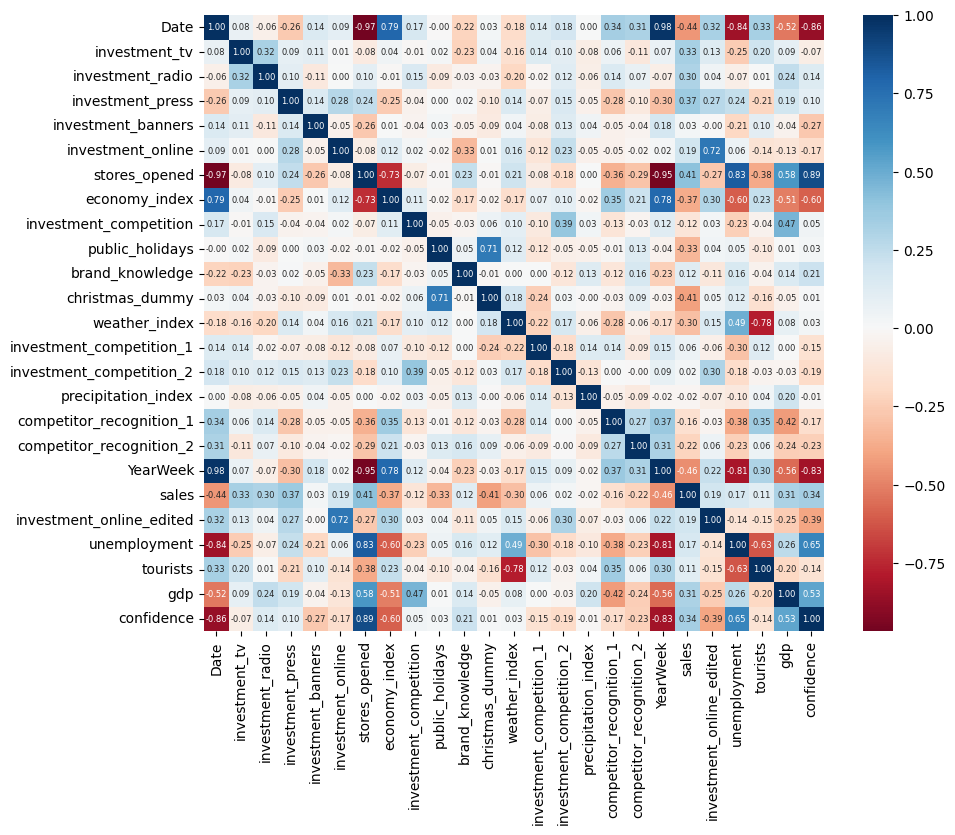

In [1024]:
# Heatmap
plt.figure(figsize=(10,8))

sns.heatmap(df_week.corr(), 
            cmap='RdBu', 
            center=0, 
            annot_kws={"size":6}, 
            annot=True, 
            fmt=".2f")

plt.show()

In [1025]:
def correlation_heatmap_single_col(df, col_name):
    plt.figure(figsize=(6, 8))
    heatmap = sns.heatmap(df.corr()[[col_name]]
                        .sort_values(by=col_name, ascending=False), 
                        vmin=-1, vmax=1, 
                        annot=True,
                        cmap='RdBu')

    heatmap.set_title(f'Features Correlating with {col_name}', fontdict={'fontsize':18}, pad=16)

    plt.show()

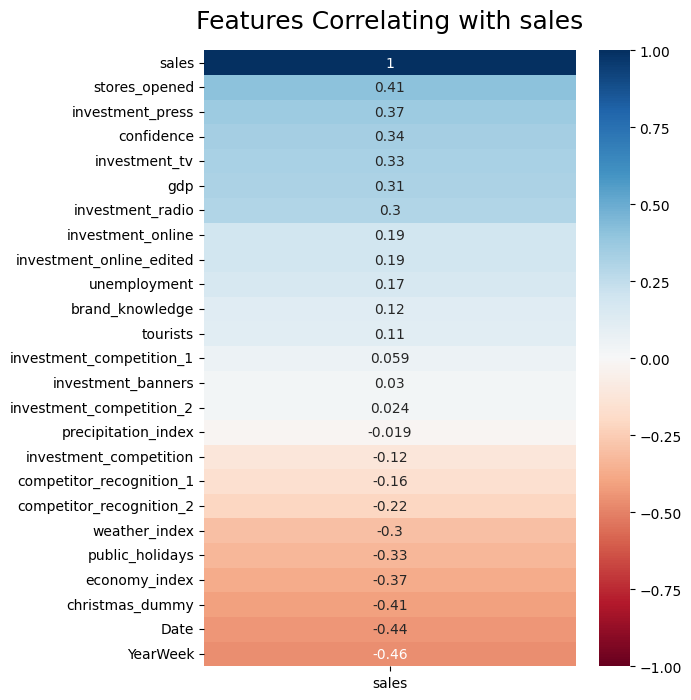

In [1026]:
correlation_heatmap_single_col(df=df_week, col_name='sales')

# Scale

In [1027]:
""" X = X.to_numpy()
y = y.to_numpy().reshape(-1,1)

# Define scaler
scaler = StandardScaler()

# Scale
X = scaler.fit_transform(X)
y = scaler.fit_transform(y) """

' X = X.to_numpy()\ny = y.to_numpy().reshape(-1,1)\n\n# Define scaler\nscaler = StandardScaler()\n\n# Scale\nX = scaler.fit_transform(X)\ny = scaler.fit_transform(y) '

In [1028]:
''' 
If I scale the data the coefficients will be scaled as well -> must be taken into account when interpereting the coefficients. 
Coefficient do not have to be scaled!!!
'''

' \nIf I scale the data the coefficients will be scaled as well -> must be taken into account when interpereting the coefficients. \nCoefficient do not have to be scaled!!!\n'

# Set up Econometric model

In [1029]:
# define cols for analysis
input_cols =      ['stores_opened',
                  'investment_tv', 
                  #'investment_radio', 
                  'investment_press', 
                  #'investment_banners', 
                  'investment_online',
                  'brand_knowledge',
                  #'investment_competition',
                  #'investment_competition_1',
                  #'investment_competition_2',
                  #'competitor_recognition_1',
                  #'competitor_recognition_2',
                  #'precipitation_index',
                  'weather_index',
                  'christmas_dummy',
                  'economy_index',
                  #'public_holidays',
                  'tourists',
                  'gdp',
                  'unemployment'
                  ]


**Define matrix and add unit vector**

In [1030]:
# Copy variables
X = df_week[input_cols].copy()

# Add unit vector (interception in line equation)
X['unit vector'] = 1

# Copy true values of 'sales'
y = df_week[['sales']]

X

,stores_opened,investment_tv,investment_press,investment_online,brand_knowledge,weather_index,christmas_dummy,economy_index,tourists,gdp,unemployment,unit vector
0,186,9.813096e+05,236646.24270,8.712487e+05,0.724231,71.050000,0,22777.0,926941.000000,0.635931,3.601064,1
1,186,1.204436e+06,492336.78720,7.809964e+05,0.810316,54.744286,0,22905.3,872241.193548,0.635931,3.578243,1
2,186,1.321570e+06,291885.33780,9.321739e+05,0.778179,54.311429,0,23328.8,817541.387097,0.635931,3.555422,1
3,186,2.155215e+05,110500.83200,6.830815e+05,0.804275,68.302857,0,23485.3,762841.580645,0.635931,3.532601,1
4,186,9.799192e+04,58135.35929,5.398485e+05,0.817915,63.864286,0,23557.1,708141.774194,0.635931,3.509780,1
...,...,...,...,...,...,...,...,...,...,...,...,...
112,142,0.000000e+00,0.00000,2.018774e+06,0.709503,65.965714,0,28175.0,837624.600000,0.330304,2.803849,1
113,142,0.000000e+00,0.00000,9.954599e+05,0.778967,67.607143,0,28109.8,862462.000000,0.330304,2.868371,1
114,142,0.000000e+00,0.00000,1.652220e+06,0.721600,71.281429,0,28290.7,862462.000000,0.330304,2.868371,1
115,142,0.000000e+00,0.00000,9.946260e+05,0.795736,63.042857,0,28608.6,862462.000000,0.330304,2.868371,1


In [1031]:
y.head(5)

,sales
0,28225189.15
1,33173110.86
2,30504393.42
3,30335675.45
4,25670890.36


**Calculate coefficients using Least Square Method**

In [1032]:
''' 
OLS (Ordinary Least Square method) equation:

gamma = (X^T · X)^-1 · X^T · y

'''

' \nOLS (Ordinary Least Square method) equation:\n\ngamma = (X^T · X)^-1 · X^T · y\n\n'

In [1033]:
# Calculate gammas using OLS: 
XTX_inv = np.linalg.inv(X.T.dot(X))
XTy = X.T.dot(y)
gamma = XTX_inv.dot(XTy)

In [1034]:
# Create df with the results
coeff_df = pd.DataFrame({'coeff':gamma.flatten().tolist()})
coeff_df = coeff_df.iloc[:-1].copy()
coeff_df['features'] = input_cols

coeff_df

,coeff,features
0,4.424886e+04,stores_opened
1,1.739043e+00,investment_tv
2,1.755397e+00,investment_press
3,1.533671e+00,investment_online
4,1.330744e+07,brand_knowledge
5,-1.105154e+05,weather_index
6,-5.907028e+06,christmas_dummy
7,-4.575330e+02,economy_index
8,-2.269353e+00,tourists
9,-1.525879e+05,gdp


In [1035]:
# Doing the same with library:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     23.58
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.27e-23
Time:                        15:41:40   Log-Likelihood:                -1822.3
No. Observations:                 117   AIC:                             3669.
Df Residuals:                     105   BIC:                             3702.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
stores_opened      4.425e+04   2.46e+0

# Calculate y, Evaluate and Plot

**Calculate y**

In [1036]:
''' 
y(i) = gamma(0)*unit_vector(i) + x(i)(1)*gamma(1) + ...... + x(n)(n)*gamma(n)

'''

' \ny(i) = gamma(0)*unit_vector(i) + x(i)(1)*gamma(1) + ...... + x(n)(n)*gamma(n)\n\n'

In [1037]:
# Multiply matrix (features) by vector (gammas)
y_calc = np.dot(X, gamma).flatten().tolist()
y_calc[:3]

[27106182.741637103, 30819662.822340876, 30455887.42282128]

In [1038]:
# Prediction y
prediction = pd.DataFrame({'sales_calc':y_calc})
prediction['sales'] = df_week['sales'].copy()

prediction

,sales_calc,sales
0,2.710618e+07,28225189.15
1,3.081966e+07,33173110.86
2,3.045589e+07,30504393.42
3,2.668752e+07,30335675.45
4,2.693685e+07,25670890.36
...,...,...
112,2.301230e+07,23974410.26
113,2.215370e+07,20884279.92
114,2.190871e+07,21475590.81
115,2.265178e+07,23863407.52


In [1039]:
prediction['error'] = np.abs(prediction['sales']-prediction['sales_calc'])
prediction

,sales_calc,sales,error
0,2.710618e+07,28225189.15,1.119006e+06
1,3.081966e+07,33173110.86,2.353448e+06
2,3.045589e+07,30504393.42,4.850600e+04
3,2.668752e+07,30335675.45,3.648152e+06
4,2.693685e+07,25670890.36,1.265960e+06
...,...,...,...
112,2.301230e+07,23974410.26,9.621059e+05
113,2.215370e+07,20884279.92,1.269422e+06
114,2.190871e+07,21475590.81,4.331209e+05
115,2.265178e+07,23863407.52,1.211625e+06


**Evaluation**

In [1040]:
# Mean Average Error
mae = (np.average(prediction['error'])).round(2)
print( f'MAE: {mae}')

MAE: 1136182.75


In [1041]:
# Mean Absolute Percentage Error
mape = (mean_absolute_percentage_error(prediction['sales'], prediction['sales_calc'])*100).round(2)
print( f'MAPE: {mape}%')

MAPE: 4.64%


**Plot**

In [1042]:
fig = px.line(prediction, 
              y=['sales', 'sales_calc'], 
              title='True vs calculated sales',
              height=700,
              width=1200
              )
fig.show()

# Diminishing return

**Calculate Adstock**

In [1043]:
'''
A(t) = x(t) + A(t-1)*beta

DR = A(t)^alfa
'''

'\nA(t) = x(t) + A(t-1)*beta\n\nDR = A(t)^alfa\n'

In [1044]:
# Copy variables
X_base = df_week[input_cols].copy()

# Add unit vector (interception in line equation)
X_base['unit vector'] = 1

# Copy true values of 'sales'
y_base = df_week[['sales']].copy()

y_base.head(5)

,sales
0,28225189.15
1,33173110.86
2,30504393.42
3,30335675.45
4,25670890.36


In [1045]:
# Function for Adstocked variables
def adstock(x, beta):
    return tsa.filters.recursive_filter(x, beta)

# Function for Diminishing return
def dr(x, alfa):
    return x ** alfa

In [1046]:
# Calculate gammas using the formula: γ = (X^T · X)^-1 · X^T · y
def coeff(X, y):
    XTX_inv = np.linalg.inv(X.T.dot(X))
    XTy = X.T.dot(y)
    gamma = XTX_inv.dot(XTy)
    return gamma

In [1047]:
# Loop through all combinations of beta and alfa
def optimizing_function(beta_tv, alfa_tv, 
                        beta_press, alfa_press, 
                        beta_online, alfa_online,
                        #beta_radio, alfa_radio,
                        ):

    new_X = {}
    
    # Add Diminishing returns
    new_X['tv_spend'] = dr(adstock(X_base['investment_tv'], beta=beta_tv), alfa=alfa_tv)
    new_X['press_spend'] = dr(adstock(X_base['investment_press'], beta=beta_press), alfa=alfa_press)
    new_X['online_spend'] = dr(adstock(X_base['investment_online'], beta=beta_online), alfa=alfa_online)
    #new_X['radio_spend'] = dr(adstock(X_base['investment_radio'], beta=beta_radio), alfa=alfa_radio)

    # Create new DataFrame
    df_new = pd.DataFrame.from_dict(new_X)
    df_new = pd.concat([X_base, df_new], axis=1)

    # Drop original sales
    df_new = df_new.drop(['investment_tv', 'investment_online', 'investment_press'], axis=1)
   
    # Compute coefficients
    gamma = coeff(df_new, y_base)

    # Add calculated sales
    df_new['sales_pred'] = np.dot(df_new, gamma)

    # Add true value
    df_new['sales'] = y_base['sales'].copy()

    # Calculate MAPE
    mape = (mean_absolute_percentage_error(y_base['sales'], df_new['sales_pred']) * 100).round(2)

    return mape

In [1048]:
# Define the list of hyperparameters to optimize
instrum = ng.p.Instrumentation(

    # Define boundaries of the optimized variables
    beta_tv = ng.p.Scalar(lower=0, upper=1),
    alfa_tv = ng.p.Scalar(lower=0, upper=1),
    
    alfa_press = ng.p.Scalar(lower=0, upper=1),
    beta_press = ng.p.Scalar(lower=0, upper=1),

    alfa_online = ng.p.Scalar(lower=0, upper=1),
    beta_online = ng.p.Scalar(lower=0, upper=1),

    #alfa_radio = ng.p.Scalar(lower=0, upper=1),
    #beta_radio = ng.p.Scalar(lower=0, upper=1)
)

In [1049]:
# Set up the optimizer
optimizer = ng.optimizers.NGOpt(parametrization=instrum, budget=2500)

# Run the optimizer
recommendation = optimizer.minimize(optimizing_function)

In [1050]:
# Retreive the best values into a dictionary
best_params = recommendation.value[1]

best_params

{'beta_tv': 0.5835864543914795,
 'alfa_tv': 0.9989113807678223,
 'alfa_press': 2.2980850644671594e-07,
 'beta_press': 0.5411506295204163,
 'alfa_online': 0.02666985243558884,
 'beta_online': 0.0014837248018011453}

# Diminishing return - best params

In [1051]:
# Define best params 
alfa_tv = best_params['alfa_tv']
beta_tv = best_params['beta_tv']

alfa_press = best_params['alfa_press']
beta_press = best_params['beta_press']

alfa_online = best_params['alfa_online']
beta_online = best_params['beta_online']

""" alfa_radio = best_params['alfa_radio']
beta_radio = best_params['beta_radio'] """

" alfa_radio = best_params['alfa_radio']\nbeta_radio = best_params['beta_radio'] "

In [1052]:
# Run with the best params
new_X = {}
    
# Add Diminishing returns
new_X['tv_spend'] = dr(adstock(X_base['investment_tv'], beta=beta_tv), alfa=alfa_tv)
new_X['press_spend'] = dr(adstock(X_base['investment_press'], beta=beta_press), alfa=alfa_press)
new_X['online_spend'] = dr(adstock(X_base['investment_online'], beta=beta_online), alfa=alfa_online)

#new_X['radio_spend'] = dr(adstock(X_base['investment_radio'], beta=beta_radio), alfa=alfa_radio)

# Create new DataFrame
df_new = pd.DataFrame.from_dict(new_X)
df_new = pd.concat([X_base, df_new], axis=1)

# Drop original sales
df_new = df_new.drop(['investment_tv', 
                      'investment_online', 
                      'investment_press', 
                      #'investment_radio'
                      ], axis=1)

# Compute coefficients
gamma = coeff(df_new, y_base)

# Add calculated sales
df_new['sales_pred'] = np.dot(df_new, gamma)

# Add true value
df_new['sales'] = y_base['sales'].copy()



# New df
coeff_df = pd.DataFrame({'coeff':gamma.flatten().tolist()})
coeff_df = coeff_df.iloc[:-1].copy()
coeff_df['features'] = input_cols


# Calculate MAPE
mape = (mean_absolute_percentage_error(y_base['sales'], df_new['sales_pred']) * 100).round(2)

print(f'MAPE: {mape}%')


MAPE: 3.62%


In [1053]:
coeff_df

,coeff,features
0,3.196734e+04,stores_opened
1,8.694047e+06,investment_tv
2,-9.530247e+04,investment_press
3,-6.181960e+06,investment_online
4,-3.469448e+02,brand_knowledge
5,8.589791e-01,weather_index
6,1.763254e+05,christmas_dummy
7,2.106855e+06,economy_index
8,-9.204727e+11,tourists
9,1.116053e+00,gdp


**Run and plot with the best params**

In [1054]:
df_new['sales_pred_base'] = prediction['sales_calc'].copy()
df_new['date'] = df_week['Date']

In [1055]:
fig = px.line(df_new,
              y=['sales', 'sales_pred', 'sales_pred_base'], 
              title='True vs predicted sales with and without DR',
              height=700,
              width=1200
              )
fig.show()